In [1]:
# Importar las librerías a utilizar
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
import numpy as np

In [2]:
# Leer los datos a analizar
ice = pd.read_csv("SeaIce.txt", delim_whitespace=True)
print('shape: ', ice.shape)
ice.head() 

shape:  (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [3]:
# Observar la media negativa
ice.mean()

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

Text(0, 0.5, 'Extent')

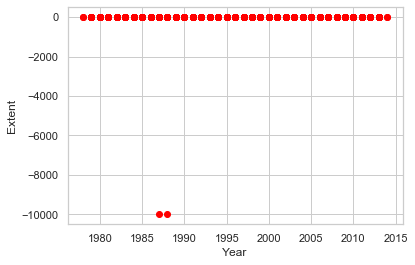

In [4]:
# Visualizar datos
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

In [5]:
# Revisar valores únicos
print ('Valores distintos en el campo data_type:', np.unique(ice.data_type.values))

Valores distintos en el campo data_type: ['-9999' 'Goddard' 'NRTSI-G']


In [6]:
# Revisar tipos de datos distintos a Goddard y NRTSI-G 
print (ice[(ice.data_type != 'Goddard') & (ice.data_type != 'NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


Text(0, 0.5, 'Extent')

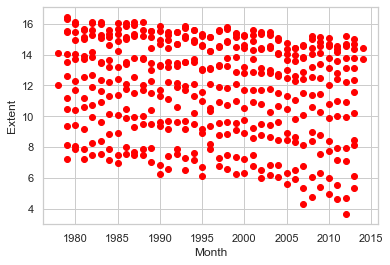

In [7]:
# Ahora se pueden limpiar los datos no esperados:
ice2 = ice[ice.data_type != '-9999']
print ('shape:', ice2.shape)
# Se vuelven a graficar
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

In [8]:
# Eliminar valores no deseados en el campo data type
ice2 = ice[ice.data_type != '-9999']

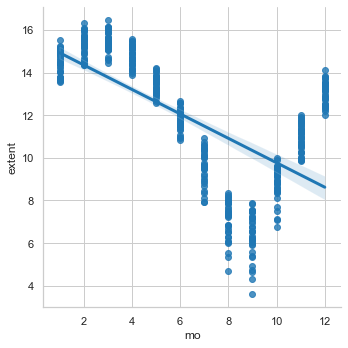

In [9]:
# Se exploran relaciones lineales
sns.lmplot("mo","extent", ice2)

In [10]:
# Calcular la media para cada mes
grouped = ice2.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print ('Means:', month_means)
print ('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


C:\Users\Paulina\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Paulina\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Paulina\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

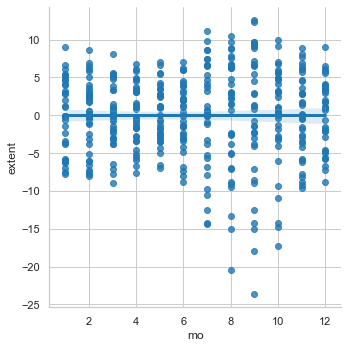

In [11]:
# Normalización de los valores por mes con base en la media
for i in range (12):
    ice2.extent[ice2.mo == i+1] = 100*( ice2.extent[ice2.mo == i+1] - month_means[i+1]) /month_means.mean ()
sns.lmplot("mo", "extent", ice2)

In [12]:
print ('mean:', ice2.extent.mean())
print ('var:', ice2.extent.var())

mean: -6.503486532875325e-15
var: 31.983239774968794


C:\Users\Paulina\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


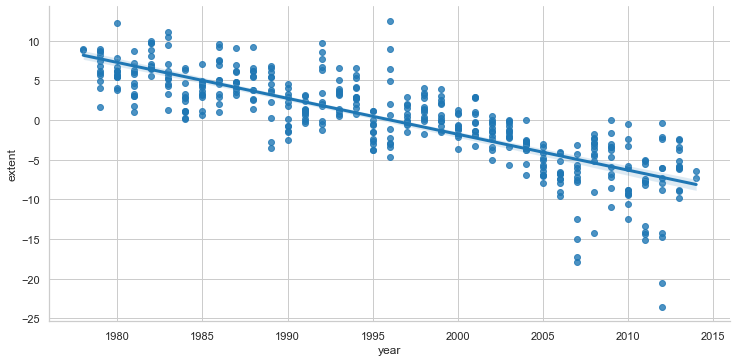

In [13]:
# Se imprime una gráfica de dispersión y un modelo de correlación lineal
sns.lmplot("year", "extent", ice2,size = 5.2, aspect = 2)

C:\Users\Paulina\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


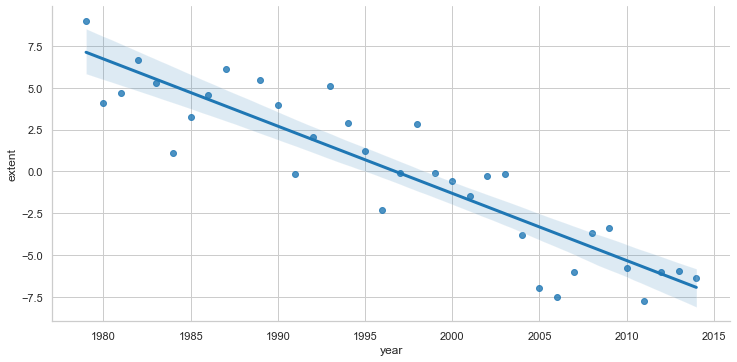

In [14]:
# Análisis para el mes de enero
jan = ice2[ice2.mo == 1];
sns.lmplot("year", "extent", jan,size = 5.2, aspect = 2)

C:\Users\Paulina\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


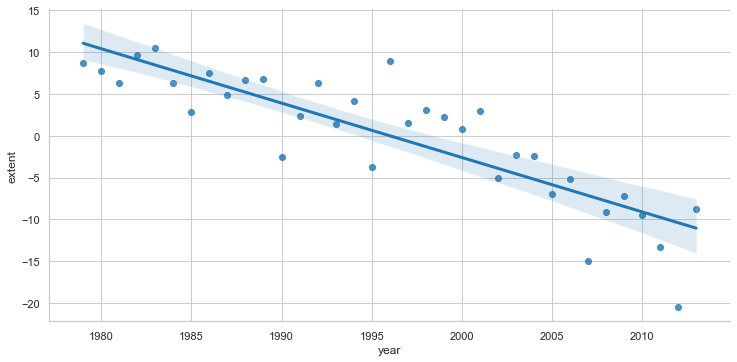

In [15]:
# Análisis para el mes de agosto
aug = ice2[ice2.mo == 8]
sns.lmplot("year", "extent", aug,size = 5.2, aspect = 2)

In [16]:
# Usar el módulo de regresión lineal de sklearn
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice2[['year']]
y = ice2[['extent']]

est.fit(x, y)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


In [17]:
from sklearn import metrics
y_hat = est.predict(x)
print ("MSE:", metrics.mean_squared_error(y_hat , y))
print ("R^2:", metrics.r2_score(y_hat , y))
print ('var:', y.var())

MSE: 10.5391316398035
R^2: 0.5067870382100231
var: extent    31.98324
dtype: float64


In [18]:
x = [[2025]]
y_hat = est.predict(x)
m = 1 # Enero
y_hat = (y_hat*month_means.mean () /100) + month_means[m]
print ("Predicción de extensión del hielo para enero de 2025 (en millones de km cuadrados):", y_hat)

Predicción de extensión del hielo para enero de 2025 (en millones de km cuadrados): [[12.93603933]]
